# **Word Graph Paper:svm**

In [1]:
pip install --upgrade pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 75.7 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/PPW

/content/drive/MyDrive/PPW


In [7]:
import pymupdf

doc = pymupdf.open("svm.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [8]:
%%capture
!pip install nltk

In [9]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/220785878
Support Vector Machine Ensemble with Bagging
Conference Paper  in  Lecture Notes


In [11]:
# Install: pip install nltk
import nltk


#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
sentences = nltk.sent_tokenize(teks)
print(sentences)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

['See discussions, stats, and author profiles for this publication at: https://www.researchgate.net/publication/220785878\nSupport Vector Machine Ensemble with Bagging\nConference Paper\xa0\xa0in\xa0\xa0Lecture Notes in Computer Science · January 2002\nDOI: 10.1007/3-540-45665-1_31\xa0·\xa0Source: DBLP\nCITATIONS\n112\nREADS\n5,212\n5 authors, including:\nS. Pang\nUnitec Institute of Technology\n69 PUBLICATIONS\xa0\xa0\xa02,075 CITATIONS\xa0\xa0\xa0\nSEE PROFILE\nHong-Mo Je\nPohang University of Science and Technology\n18 PUBLICATIONS\xa0\xa0\xa0954 CITATIONS\xa0\xa0\xa0\nSEE PROFILE\nDaijin Kim\nPohang University of Science and Technology\n301 PUBLICATIONS\xa0\xa0\xa010,656 CITATIONS\xa0\xa0\xa0\nSEE PROFILE\nAll content following this page was uploaded by Hong-Mo Je on 30 May 2014.', 'The user has requested enhancement of the downloaded file.', 'Support Vector Machine Ensemble with Bagging\nHyun-Chul Kim, Shaoning Pang, Hong-Mo Je,\nDaijin Kim, and Sung-Yang Bang\nDepartment of Compu

In [12]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    See discussions, stats, and author profiles fo...
1    The user has requested enhancement of the down...
2    Support Vector Machine Ensemble with Bagging\n...
3    Even the support vector machine (SVM) has been...
4    To\nimprove the limited classiﬁcation performa...
..                                                 ...
240  IEEE Transaction on Fuzzy Systems, 5(4) (1997)...
241  Neural Computation 6(5) (1994) 181–214\n403\n[...
242  Annual\nEugenics, 7, Part II (1936) 179–188\n4...
243  [16] Bay, B.: The UCI KDD Archive [http://kdd....
244  Irvine, CA: University\nof California, Departm...

[245 rows x 1 columns]


In [13]:
df.to_csv('kalimat_svm.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [21]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/PPW/kalimat_svm.csv")

print(df.head())      # lihat isi awal
print(df.columns)     # lihat nama kolom


                                             kalimat
0  See discussions, stats, and author profiles fo...
1  The user has requested enhancement of the down...
2  Support Vector Machine Ensemble with Bagging\n...
3  Even the support vector machine (SVM) has been...
4  To\nimprove the limited classiﬁcation performa...
Index(['kalimat'], dtype='object')


In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/PPW/kalimat_svm.csv")

# Gabungkan semua teks di kolom 'kalimat' menjadi 1 teks panjang
text = " ".join(df['kalimat'].astype(str).tolist())

# Preprocess the text
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix
co_matrix_df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,practical,linearly,need,postech,69,399,ξi,lawrence,much,nature,...,experts,denker,contains,personnaz,xi,input,wij,part,designed,let
practical,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
linearly,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
need,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
postech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
input,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wij,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
part,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
designed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


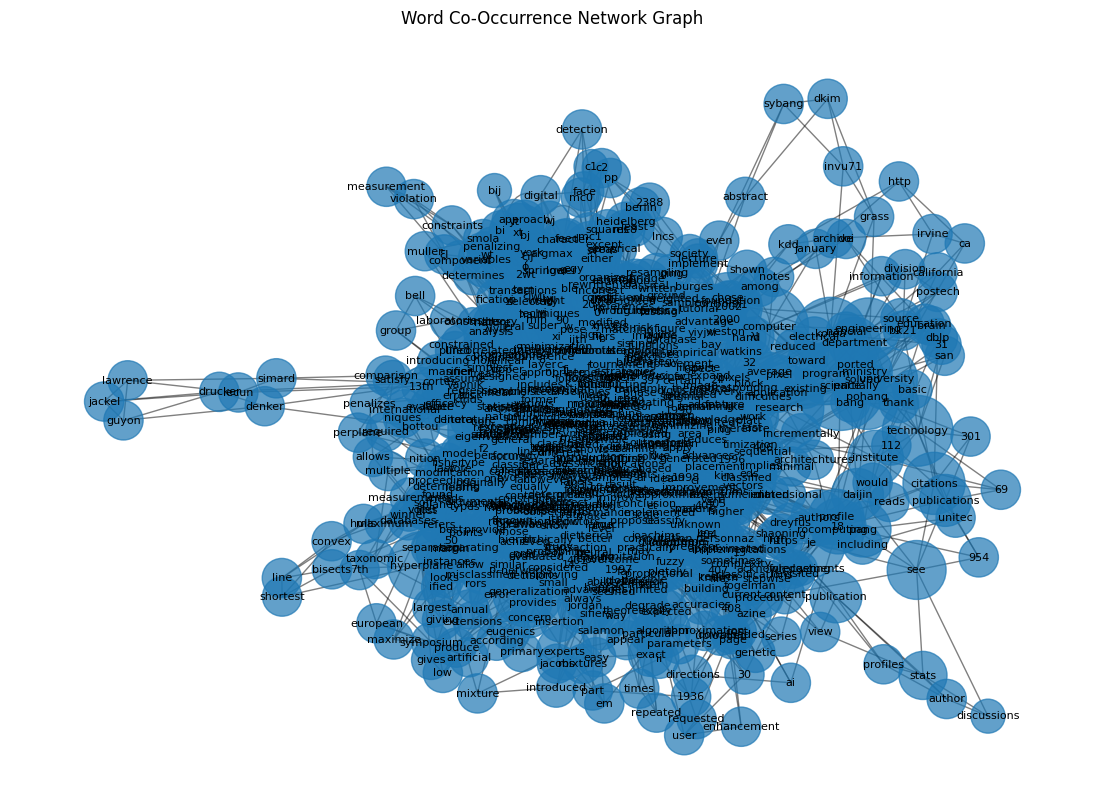

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graph kosong
G = nx.Graph()

# Tambahkan edge berdasarkan nilai co-occurrence
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        if count > 0:
            G.add_edge(word, neighbor, weight=count)

# Ukuran node berdasarkan jumlah koneksi
node_sizes = [G.degree(node) * 200 for node in G.nodes()]

plt.figure(figsize=(14, 10))

# Posisi node
pos = nx.spring_layout(G, k=0.5)

# Gambar nodes dan edges
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Word Co-Occurrence Network Graph")
plt.axis("off")
plt.show()


In [27]:
# Hitung jumlah kata dalam graph
jumlah_kata = G.number_of_nodes()

jumlah_kata


776

In [28]:
list(G.nodes())


['see',
 'discussions',
 'stats',
 'publications',
 'citations',
 'profile',
 'je',
 '954',
 'daijin',
 'content',
 'author',
 'profiles',
 'view',
 'publication',
 'https',
 'support',
 '405',
 'vector',
 'machine',
 'downloaded',
 'file',
 'abstract',
 'even',
 '1',
 'introduction',
 'drawn',
 '2',
 'machines',
 'b',
 '3',
 'scale',
 'optimum',
 'sometimes',
 'vectors',
 'obtained',
 'use',
 'ensemble',
 'tor',
 'applied',
 'svm',
 'aggregating',
 'nj',
 '10',
 'hierarchical',
 'korea',
 'nancial',
 'toward',
 'electrical',
 'research',
 'institute',
 'program',
 'cortes',
 'vapnik',
 'network',
 'burges',
 'tutorial',
 'joachims',
 'making',
 'kernel',
 'methods',
 'fast',
 'training',
 'weston',
 'watkins',
 'new',
 'classical',
 'figure',
 'given',
 'test',
 'x',
 'due',
 'l',
 'weight',
 'w',
 'represented',
 'feature',
 'size',
 '64',
 'pattern',
 'learning',
 'mit',
 'using',
 'bagging',
 'proposed',
 'promising',
 'minimizing',
 'second',
 '20',
 'practical',
 'dietterich',
 '

In [29]:
jumlah_edges = G.number_of_edges()

jumlah_kata, jumlah_edges


(776, 3601)

In [25]:
# Hitung PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Konversi ke DataFrame biar rapi
pagerank_df = pd.DataFrame(
    sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True),
    columns=["word", "pagerank"]
)

# Tampilkan 20 kata paling penting
pagerank_df.head(20)


,word,pagerank
0,svm,0.036170
1,classiﬁcation,0.018764
2,ensemble,0.017598
3,data,0.011390
4,svms,0.009140
5,2,0.008694
6,method,0.008594
7,support,0.008510
8,training,0.008100
9,vector,0.007946


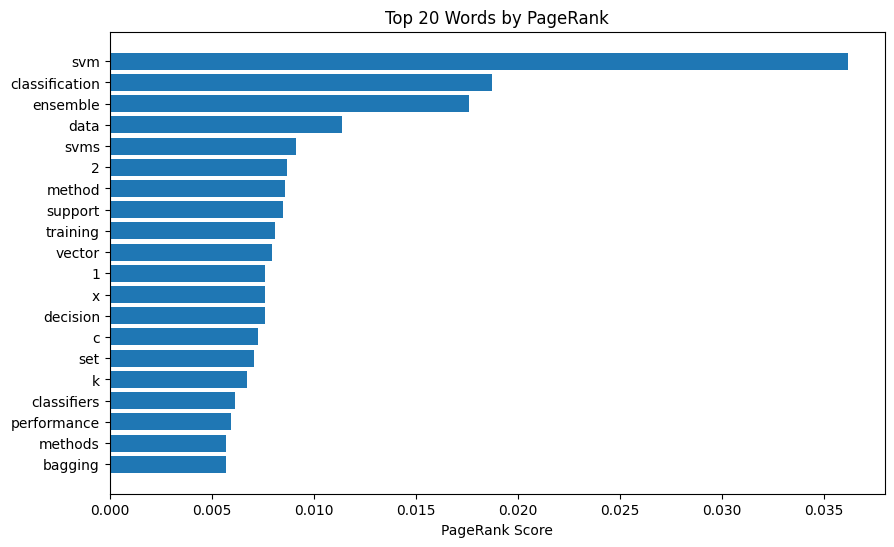

In [26]:
top_n = 20
top_words = pagerank_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_words["word"], top_words["pagerank"])
plt.gca().invert_yaxis()  # Supaya ranking 1 di atas
plt.xlabel("PageRank Score")
plt.title(f"Top {top_n} Words by PageRank")
plt.show()


In [15]:
%%capture
pip install networkx

In [16]:
import networkx as nx
arr = co_matrix_df.to_numpy()
G=nx.from_numpy_array(arr)


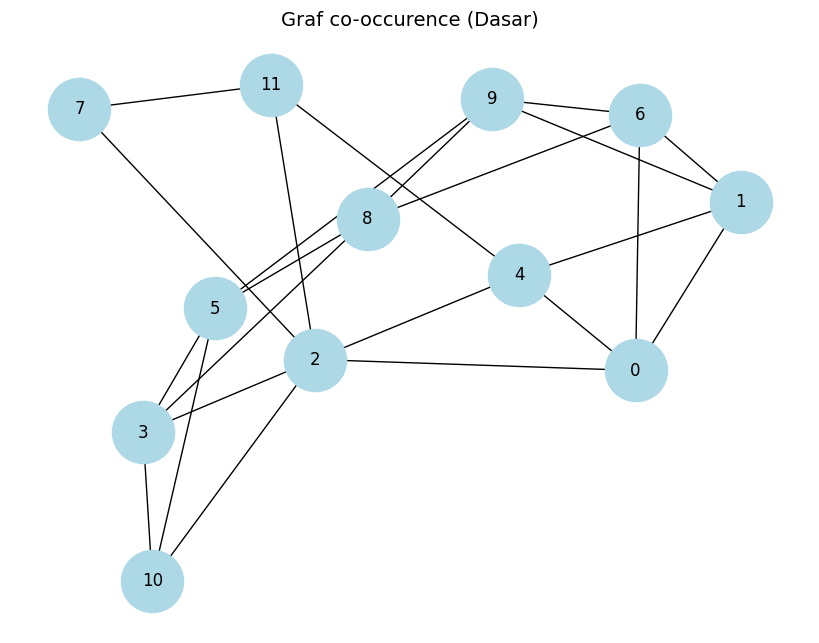

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
plt.title("Graf co-occurence (Dasar)", fontsize=14)
plt.show()